In [16]:
# Step 0: Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [17]:
# Step 1: Load the Grayscale Data
def load_data(path):
    """Loads the grayscale image dataset from .mat file"""
    data = loadmat(path)
    X = data['X']
    y = data['y']
    print("Shape of X:", X.shape)
    X = np.expand_dims(X, axis=-1)  # Ensuring the images have a single grayscale channel
    y[y == 10] = 0  # Replacing label '10' with '0' as per SVHN conventions
    return X, y


In [18]:
# Step 2: Define File Paths and Load Data
train_path = r'C:\Users\Lapfix\Desktop\New folder\New folder/train_gray.mat'
test_path = r'C:\Users\Lapfix\Desktop\New folder\New folder/test_gray.mat'
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)


Shape of X: (73257, 32, 32)
Shape of X: (26032, 32, 32)
Training Set Shape: (73257, 32, 32, 1) (73257, 1)
Test Set Shape: (26032, 32, 32, 1) (26032, 1)


In [19]:
# Step 3: Split Train Set into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7)

In [20]:
# Step 4: One-Hot Encode Labels
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)


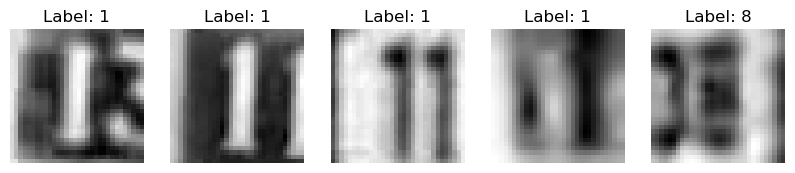

In [31]:
# Step 5: Visualize Some Images with Their Labels
def display_sample_images(images, labels, num_images=5):
    """Display sample images with their labels."""
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

# Display some images from the training set
display_sample_images(X_train, y_train)

In [21]:
# Step 6: Define the Convolutional Neural Network Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


C:\Users\Lapfix\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Step 7: Compile the Model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Step 8: Train the Model and Evaluate on Validation Set
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=128)

Epoch 1/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 55s 104ms/step - accuracy: 0.3488 - loss: 1.9867 - val_accuracy: 0.7804 - val_loss: 0.7374
Epoch 2/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 51s 101ms/step - accuracy: 0.7659 - loss: 0.7473 - val_accuracy: 0.8331 - val_loss: 0.5369
Epoch 3/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.8210 - loss: 0.5874 - val_accuracy: 0.8925 - val_loss: 0.3645
Epoch 4/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 50s 101ms/step - accuracy: 0.8406 - loss: 0.5203 - val_accuracy: 0.9005 - val_loss: 0.3513
Epoch 5/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 53s 107ms/step - accuracy: 0.8551 - loss: 0.4838 - val_accuracy: 0.8973 - val_loss: 0.3501
Epoch 6/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 53s 106ms/step - accuracy: 0.8665 - loss: 0.4473 - val_accuracy: 0.9049 - val_loss: 0.3395
Epoch 7/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.8744 - loss: 0.4218 - val_accuracy: 0.9127 - val_loss: 0.2991
Epoch 8/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - accuracy: 0.8766 - loss: 0

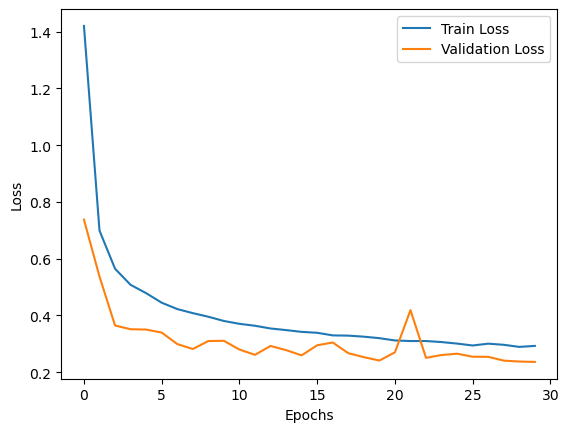

In [24]:
# Step 9: Visualize Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
# Step 10: Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9345 - loss: 0.2555
Test Accuracy: 93.56%


814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


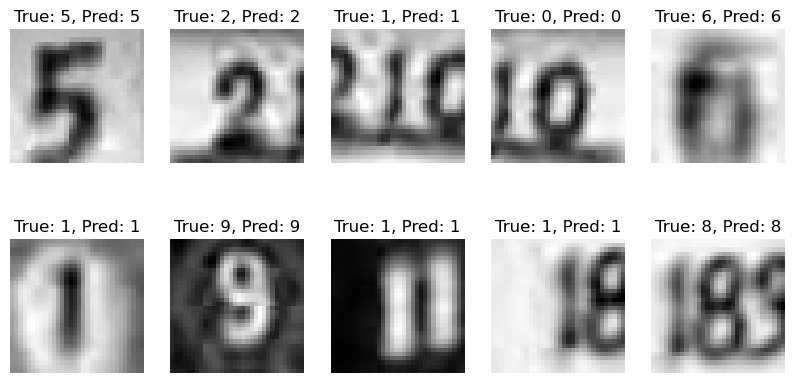

In [26]:
# Step 11: Visualize Predicted vs. True Labels
def plot_predictions(images, true_labels, predictions, nrows, ncols):
    """Displays predicted and actual labels."""
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i, :, :, 0], cmap='gray')
        true_label = np.argmax(true_labels[i])
        pred_label = np.argmax(predictions[i])
        ax.set_title(f"True: {true_label}, Pred: {pred_label}")
        ax.axis('off')
    plt.show()

predictions = model.predict(X_test)
plot_predictions(X_test, y_test, predictions, 2, 5)
